# CO2 Emissions Prediction Project

 This project uses the **CO2 Emissions dataset (Canada)** to explore relationships between vehicle features
 (engine size, cylinders, fuel consumption) and CO2 emissions. It applies several regression models
 (Linear Regression, Decision Tree, Random Forest, Gradient Boosting, Neural Network, and SVR) to# predict CO2 emissions. Finally, the trained models are used to estimate CO2 emissions for three Iranian
 engines: **TU5, XU7, and EF7**.

#  Import Required Libraries
### Import necessary Python libraries for data analysis, visualization, and machine learning.

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

##  Load Dataset
#### Load CO2 Emissions dataset from CSV file.

In [23]:
df = pd.read_csv("CO2 Emissions_Canada.csv")
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Dataset Overview
#### Print dataset shape, datatypes, missing values, and basic statistics.

In [24]:
print("Dataset Shape:", df.shape)
print("-"*50,"\nData Types:")
print(df.dtypes)
print("-"*50,"\nMissing Values:")
print(df.isnull().sum())
print("-"*50,"\nBasic Statistics:")
df.describe().T

Dataset Shape: (7385, 12)
-------------------------------------------------- 
Data Types:
Make                                 object
Model                                object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                             int64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)           int64
CO2 Emissions(g/km)                   int64
dtype: object
-------------------------------------------------- 
Missing Values:
Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)  

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
Fuel Consumption Hwy (L/100 km),7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
Fuel Consumption Comb (L/100 km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
Fuel Consumption Comb (mpg),7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


## Distribution of CO2 Emissions
#### Plot histogram of CO2 emissions values.

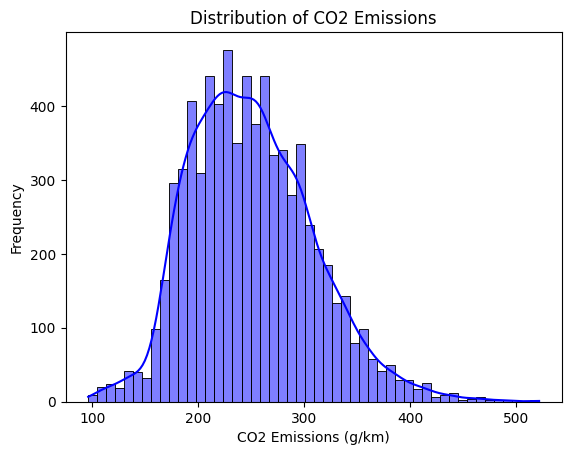

In [25]:
plt.close
sns.histplot(df['CO2 Emissions(g/km)'], kde=True, bins=50, color='blue')
plt.title('Distribution of CO2 Emissions')
plt.xlabel('CO2 Emissions (g/km)')
plt.ylabel('Frequency')
plt.show()

## Scatterplot: Engine Size vs CO2 Emissions
#### Visualize correlation between engine size and CO2 emissions.

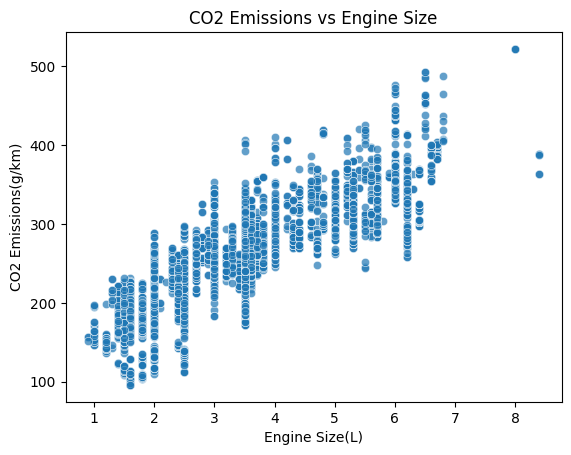

In [26]:
plt.close()
sns.scatterplot(x='Engine Size(L)', y='CO2 Emissions(g/km)', data=df, alpha=0.7)
plt.title('CO2 Emissions vs Engine Size')
plt.show()

# Scatterplot: Cylinders vs CO2 Emissions
#### Visualize correlation between number of cylinders and CO2 emissions.

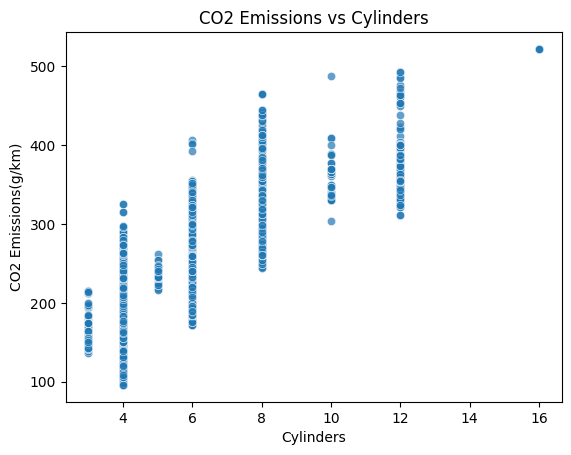

In [27]:
plt.close()
sns.scatterplot(x='Cylinders', y='CO2 Emissions(g/km)', data=df, alpha=0.7)
plt.title('CO2 Emissions vs Cylinders')
plt.show()

# Barplot: Average CO2 Emissions by Fuel Type
#### Compare average CO2 emissions based on fuel type.

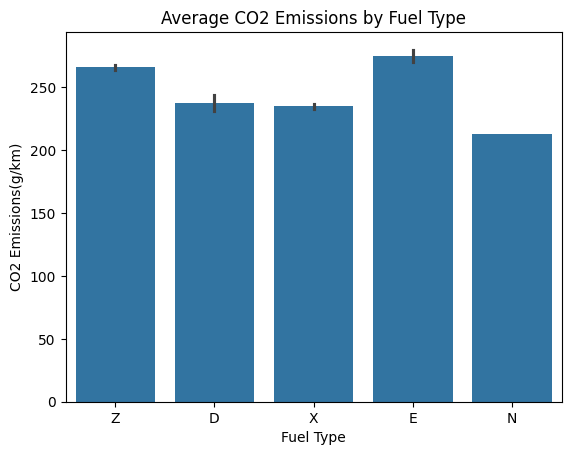

In [28]:
plt.close()
sns.barplot(x='Fuel Type', y='CO2 Emissions(g/km)', data=df, estimator=np.mean)
plt.title('Average CO2 Emissions by Fuel Type')
plt.show()

## Boxplot: CO2 Emissions by Vehicle Class
#### Show distribution of CO2 emissions across vehicle classes.

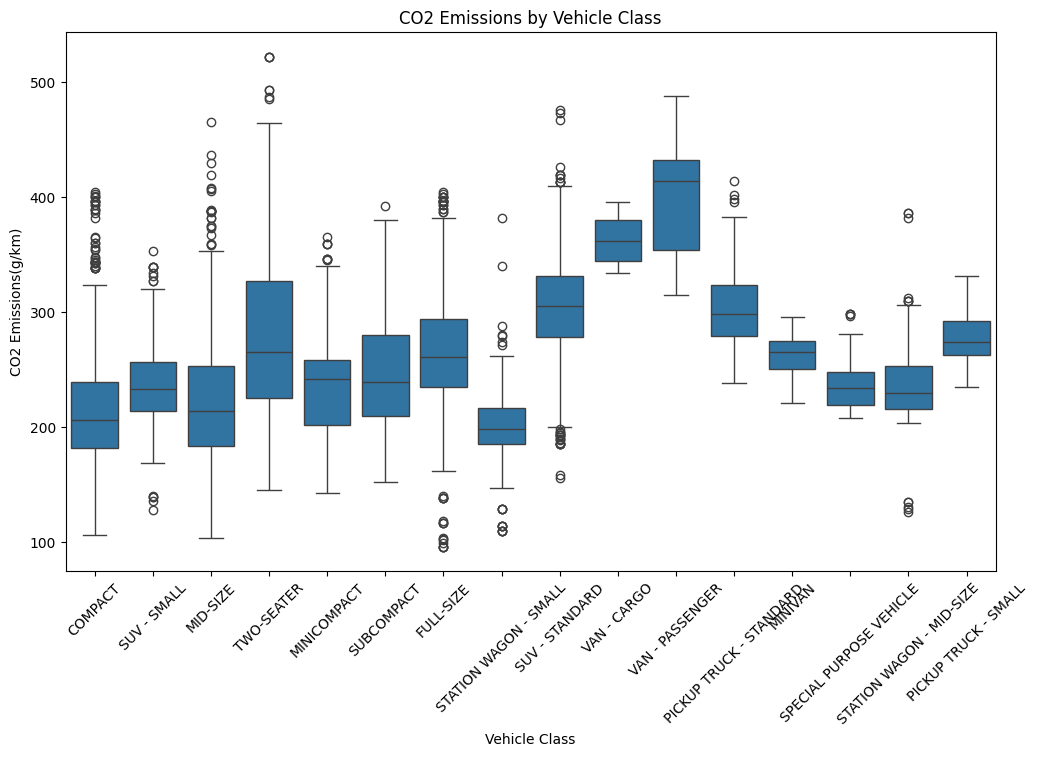

In [29]:
plt.close()
plt.figure(figsize=(12, 7))
sns.boxplot(x='Vehicle Class', y='CO2 Emissions(g/km)', data=df)
plt.xticks(rotation=45)
plt.title('CO2 Emissions by Vehicle Class')
plt.show()

## Correlation Matrix
#### Show heatmap of correlations between numerical features.

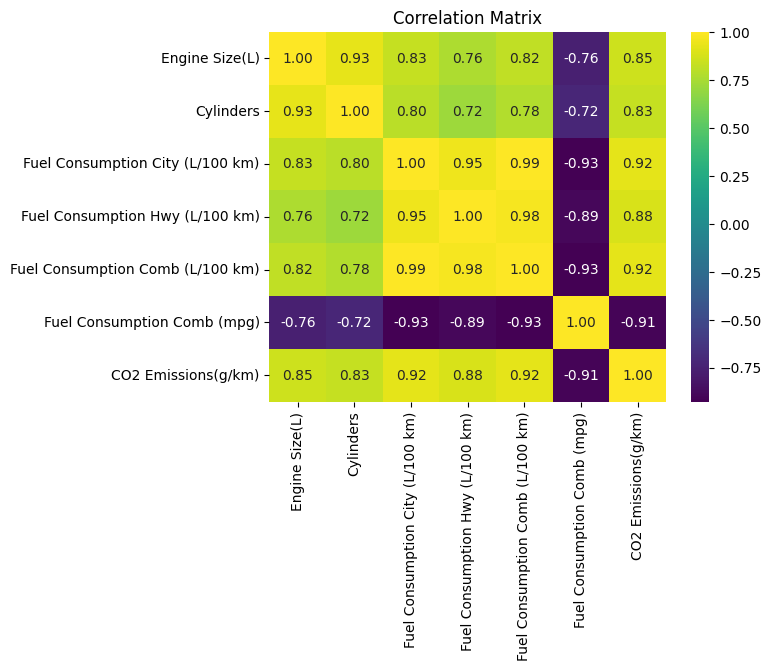

In [30]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr = df[numeric_cols].corr()
plt.close()
sns.heatmap(corr, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Feature Selection
#### Select relevant features and target variable.

In [31]:
df_selected = df[[
        "Engine Size(L)",
        "Cylinders",
        "Fuel Consumption City (L/100 km)",
        "Fuel Consumption Hwy (L/100 km)",
        "Fuel Consumption Comb (L/100 km)",
        "Fuel Consumption Comb (mpg)",
        "CO2 Emissions(g/km)"
        ]]

feature = df_selected.drop(["CO2 Emissions(g/km)"], axis=1)
target = df_selected["CO2 Emissions(g/km)"]

## Train-Test Split & Scaling
#### Split data into training/testing sets and apply standard scaling.

In [32]:
x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

models_MSE = {}
models_MAE = {}
models_R2 = {}

## Linear Regression Model
#### Train and evaluate Linear Regression.

In [33]:
model_LinearRegression = LinearRegression()
model_LinearRegression.fit(x_train, y_train)
y_pred = model_LinearRegression.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

models_MSE["LinearRegression"] = mse
models_MAE["LinearRegression"] = mae
models_R2["LinearRegression"] = r2

print("MSE:", mse)
print("MAE:", mae)
print("R²:", r2)

MSE: 337.4608996974324
MAE: 11.530719771854931
R²: 0.9018902750130586


## Decision Tree Regressor
#### Train and evaluate Decision Tree model.

In [34]:
model_DecisionTreeRegressor = DecisionTreeRegressor(max_depth=5, random_state=42)
model_DecisionTreeRegressor.fit(x_train, y_train)
y_pred = model_DecisionTreeRegressor.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

models_MSE["DecisionTreeRegressor"] = mse
models_MAE["DecisionTreeRegressor"] = mae
models_R2["DecisionTreeRegressor"] = r2

print("MSE:", mse)
print("MAE:", mae)
print("R²:", r2)

MSE: 231.1720069438911
MAE: 7.021932565788981
R²: 0.9327915558623843


## Random Forest Regressor
#### Train and evaluate Random Forest model.

In [35]:
model_RandomForestRegressor = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
model_RandomForestRegressor.fit(x_train, y_train)
y_pred = model_RandomForestRegressor.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

models_MSE["RandomForestRegressor"] = mse
models_MAE["RandomForestRegressor"] = mae
models_R2["RandomForestRegressor"] = r2

print("MSE:", mse)
print("MAE:", mae)
print("R²:", r2)

MSE: 84.2738092703876
MAE: 3.220991779810011
R²: 0.9754991459498483


## Gradient Boosting Regressor
#### Train and evaluate Gradient Boosting model.

In [36]:
model_GradientBoostingRegressor = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
model_GradientBoostingRegressor.fit(x_train, y_train)
y_pred = model_GradientBoostingRegressor.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

models_MSE["GradientBoostingRegressor"] = mse
models_MAE["GradientBoostingRegressor"] = mae
models_R2["GradientBoostingRegressor"] = r2

print("MSE:", mse)
print("MAE:", mae)
print("R²:", r2)

MSE: 93.06941857357509
MAE: 4.901206961903359
R²: 0.9729420058171633


## MLP Regressor (Neural Network)
#### Train and evaluate Multi-layer Perceptron model.

In [37]:
model_MLPRegressor = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', max_iter=500, random_state=42)
model_MLPRegressor.fit(x_train, y_train)
y_pred = model_MLPRegressor.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

models_MSE["MLPRegressor"] = mse
models_MAE["MLPRegressor"] = mae
models_R2["MLPRegressor"] = r2

print("MSE:", mse)
print("MAE:", mae)
print("R²:", r2)

MSE: 139.85798747794271
MAE: 5.338857347080592
R²: 0.9593392043315516


C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


## Support Vector Regressor (SVR)
#### Train and evaluate SVR model.

In [38]:
model_svr = SVR(kernel='rbf', C=100, epsilon=0.1)
model_svr.fit(x_train, y_train)
y_pred = model_svr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

models_MSE["SVR"] = mse
models_MAE["SVR"] = mae
models_R2["SVR"] = r2

print("MSE:", mse)
print("MAE:", mae)
print("R²:", r2)

MSE: 217.88669362917645
MAE: 5.684569235147893
R²: 0.9366539838854253


## Model Comparison - MSE
#### Compare models by Mean Squared Error.

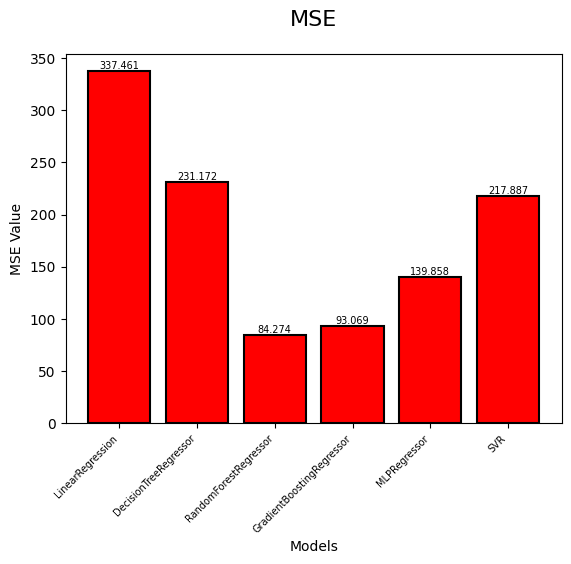

In [39]:
plt.close()
bars = plt.bar(models_MSE.keys(),models_MSE.values(), color = "red", edgecolor='black', linewidth=1.5,)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
        f'{height:.3f}', ha='center', va='bottom', fontsize=7)
    
plt.title('MSE', fontsize=16, pad=20)
plt.xlabel('Models')
plt.ylabel('MSE Value')
plt.xticks(rotation=45, ha='right', fontsize=7)
plt.show()

## Model Comparison - MAE
#### Compare models by Mean Absolute Error.

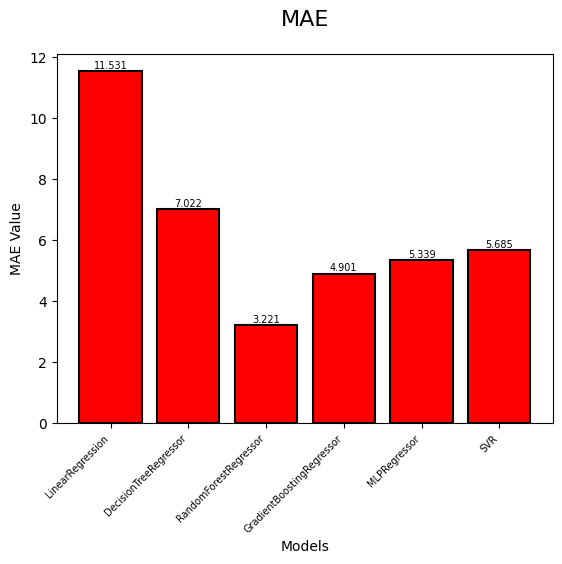

In [40]:
plt.close()
bars = plt.bar(models_MAE.keys(),models_MAE.values(), color = "red", edgecolor='black', linewidth=1.5,)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
        f'{height:.3f}', ha='center', va='bottom', fontsize=7)
    
plt.title('MAE', fontsize=16, pad=20)
plt.xlabel('Models')
plt.ylabel('MAE Value')
plt.xticks(rotation=45, ha='right', fontsize=7)
plt.show()

## Model Comparison - R²
#### Compare models by R² Score.

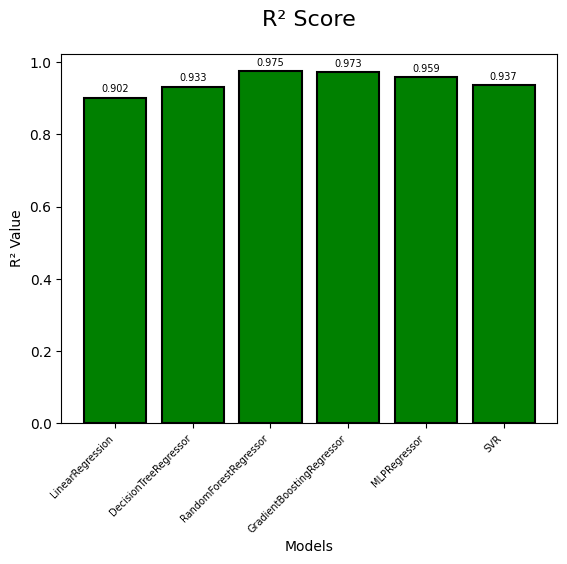

In [41]:
plt.close()
bars = plt.bar(models_R2.keys(),models_R2.values(), color = "green", edgecolor='black', linewidth=1.5,)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
        f'{height:.3f}', ha='center', va='bottom', fontsize=7)
    
plt.title('R² Score', fontsize=16, pad=20)
plt.xlabel('Models')
plt.ylabel('R² Value')
plt.xticks(rotation=45, ha='right', fontsize=7)
plt.show()

## Prediction for Iranian Engines (TU5, XU7, EF7)
#### Estimate CO2 emissions for sample engine parameters using trained models.

In [42]:
models = [model_RandomForestRegressor,
    model_GradientBoostingRegressor,
    model_MLPRegressor,
    model_svr,
    model_DecisionTreeRegressor,
    model_LinearRegression
    ]

# co2 tu5:~182g/km   xu7:~200g/km  ef7:~180g/km

engins = {"tu5":[[1.6, 4, 10.1, 6, 7.5, 28]],
        "xu7":[[1.8, 4, 10, 7, 8.5, 26]],
        "ef7":[[1.7, 4, 8.5, 6.2, 7.5, 31]]
        }


for model in models:
    model_name = str(model).split("(")[0]
    for engin in engins.keys():
        engin_scaled = scaler.transform(engins[engin])
        engin_co2 = model.predict(engin_scaled)
        print(f"{model_name} predict for co2 {engin}: {engin_co2}")
    print("-"*60)

RandomForestRegressor predict for co2 tu5: [193.51583333]
RandomForestRegressor predict for co2 xu7: [199.94488095]
RandomForestRegressor predict for co2 ef7: [179.87464286]
------------------------------------------------------------
GradientBoostingRegressor predict for co2 tu5: [196.61731259]
GradientBoostingRegressor predict for co2 xu7: [202.59669057]
GradientBoostingRegressor predict for co2 ef7: [184.9105866]
------------------------------------------------------------
MLPRegressor predict for co2 tu5: [204.98111316]
MLPRegressor predict for co2 xu7: [216.89524041]
MLPRegressor predict for co2 ef7: [194.18355874]
------------------------------------------------------------
SVR predict for co2 tu5: [201.34401159]
SVR predict for co2 xu7: [211.52661567]
SVR predict for co2 ef7: [185.16491842]
------------------------------------------------------------
DecisionTreeRegressor predict for co2 tu5: [177.31018519]
DecisionTreeRegressor predict for co2 xu7: [200.62162162]
DecisionTreeRe

C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Us